In [1]:
import numpy as np

# Plots

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Numerical Differentiation

## Approximation of the first derivative of a function

The true derivative of a differentiable function $f$ at $x$ is

$$f'(x)=\lim _{h\to 0}{\frac {f(x+h)-f(x)}{h}}.$$

However, if we choose $h$ small enough, we can deriver some approximation of this derivative.

Three forms are commonly considered: forward, backward, and central differences:

* Forward difference:
$\Delta _{h}[f](x)=f(x+h)-f(x).$

* Backward difference: $\nabla _{h}[f](x)=f(x)-f(x-h).$

* Central difference: $\delta _{h}[f](x)=\frac{1}{2}\left(f\left(x+h\right)-f\left(x-h\right)\right).$

Assuming that f is differentiable, we have

* $f'(x) \approx \frac {\Delta _{h}[f](x)}{h},$

* $f'(x) \approx \frac {\nabla _{h}[f](x)}{h},$

* $f'(x) \approx \frac {\delta _{h}[f](x)}{h}.$

**Example**: Consider $f(x) = 3x\exp(x) - \cos(x)$ and let's discretize $[0,1]$ using $h=0.1$

In [2]:
a=0
b=1
N=10
x=np.linspace(a,b,N+1)
h=1/N
print('h = %.2f' % h)
f=lambda x: 3*x*np.exp(x) - np.cos(x)
y=f(x)

h = 0.10


Consider the middle points only (all points except 0 and 1)

In [3]:
x[1:N]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

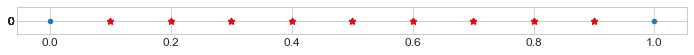

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, .5), sharex = False)
_ = ax.scatter(x,np.zeros(len(x)), s = 20)
_ = ax.scatter(x[1:N],np. zeros(len(x[1:N])), color='red', marker=(5,2))
_ = ax.set_yticks(np.zeros(len(x)), '')

We are going to compare the approximation of derivatives at these points in terms of accuracy. For example, for $x=0.1$, we have

In [5]:
x0=0.5
# Forward difference
Forward = (f(x0+h)-f(x0))/h
print('Forward = %.8f' % Forward)
# Backward difference
Backward = (f(x0)-f(x0-h))/h
print('Backward = %.8f' % Backward)
# Central difference
Central = (f(x0+h)-f(x0-h))/(2*h)
print('Central = %.8f' % Central)

Forward = 8.58978882
Backward = 7.26370701
Central = 7.92674791


However, the exact value of the deravitve at this point is

In [6]:
f1=lambda x: 3*np.exp(x) + np.sin(x) + 3*x*np.exp(x)
y1=f1(x0)
print('Exact = %.8f' % y1)

Exact = 7.89867126


Which in terms of accuracy, the central difference is the most accurate among all. Since

In [7]:
print('|Forward - Exact| = %.8f' % abs(Forward-y1))
print('|Backward - Exact| = %.8f' % abs(Backward-y1))
print('|Central - Exact| = %.8f' % abs(Central-y1))

|Forward - Exact| = 0.69111756
|Backward - Exact| = 0.63496425
|Central - Exact| = 0.02807666


Now consider all middle points:

In [8]:
# Forward difference
Forward = (y[2:N+1]-y[1:N])/h
# Backward difference
Backward = (y[1:N]-y[0:N-1])/h
# Central difference
Central = (y[2:N+1]-y[0:N-1])/(2*h)
# Exact
y1=f1(x[1:N])

In [9]:
abs(Forward-y1),abs(Backward-y1),abs(Central-y1)

(array([0.41538222, 0.47189435, 0.5359525 , 0.60862494, 0.69111756,
        0.78479001, 0.89117371, 1.01199202, 1.14918283]),
 array([0.38142634, 0.43343959, 0.49235595, 0.55916002, 0.63496425,
        0.7210239 , 0.81875377, 0.9297469 , 1.05579552]),
 array([0.01697794, 0.01922738, 0.02179827, 0.02473246, 0.02807666,
        0.03188306, 0.03620997, 0.04112256, 0.04669366]))

In [10]:
max(abs(Forward-y1)),max(abs(Backward-y1)),max(abs(Central-y1))

(1.1491828333368481, 1.0557955150386622, 0.04669365914909207)

## Approximation of the second derivative of a function

* Second-order central:
$f''(x)\approx {\frac {\delta _{h}^{2}[f](x)}{h^{2}}}={\frac {{\frac {f(x+h)-f(x)}{h}}-{\frac {f(x)-f(x-h)}{h}}}{h}}={\frac {f(x+h)-2f(x)+f(x-h)}{h^{2}}}.$

* Second order forward: 
$f''(x)\approx {\frac {\Delta _{h}^{2}[f](x)}{h^{2}}}={\frac {{\frac {f(x+2h)-f(x+h)}{h}}-{\frac {f(x+h)-f(x)}{h}}}{h}}={\frac {f(x+2h)-2f(x+h)+f(x)}{h^{2}}}.$
* Second order backward:
$f''(x)\approx {\frac {\nabla _{h}^{2}[f](x)}{h^{2}}}={\frac {{\frac {f(x)-f(x-h)}{h}}-{\frac {f(x-h)-f(x-2h)}{h}}}{h}}={\frac {f(x)-2f(x-h)+f(x-2h)}{h^{2}}}.$

**Example**: One more time, consider $f(x) = 3x\exp(x) - \cos(x)$ on $[0,1]$ with $h=0.1$

In [11]:
a=0
b=1
N=10
x=np.linspace(a,b,N+1)
h=1/N
#
f=lambda x: 3*x*np.exp(x) - np.cos(x)
f2=lambda x: np.cos(x) + 6*np.exp(x) + 3*x*np.exp(x)

# Central difference
Central = (y[2:N+1]-2*y[1:N]+y[0:N-1])/(h**2)

# Exact
y2=f2(x[1:N])

In [12]:
abs(Central-y2)

array([0.01050473, 0.01201459, 0.01372222, 0.01565073, 0.01782597,
       0.02027684, 0.02303568, 0.02613871, 0.02962645])

In [13]:
max(abs(Central-y2))

0.029626448418969886